In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from cnn import CNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

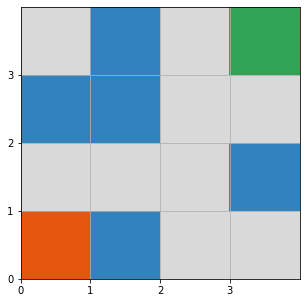

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    state_as_img=True,
)

In [4]:
target_net = CNN(
    w=deterministic_env.current_state.shape[1],
    h=deterministic_env.current_state.shape[2],
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = CNN(
    w=deterministic_env.current_state.shape[1],
    h=deterministic_env.current_state.shape[2],
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    log_freq=1,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=5000,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=20,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01)
)

dqn.run()

KeyboardInterrupt: 

In [ ]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn.mp4')
Video('dqn.mp4')

In [ ]:
dqn.evaluate()

#### Training

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')